# STAT 207 Lab 7 - Group Part - [5 total points] - Solutions

## Inference for Associations

Due: Tuesday, October 12, 11:59pm CST

## <u>Case Study</u>: Fake and Real Instagram Associations with Other Numerical Variables

In this group assignment, we will explore whether a relationship exists between an Instagram account's status (ie. fake vs. real) and some other *numerical variable* that we were given in the **fake_insta.csv** dataset. You can choose which numerical variable you find most interesting. 

For instance, one research question we could ask is: "is there an association between the **account status** and the **number of posts that an account makes**?"

We will assume that the data in this csv file contains two random samples of fake and real Instagram accounts drawn from the greater populations of ALL fake Instagram account and ALL real Instagram accounts, respectively. 


### <u>Research Questions</u>:
1. First, we would like to explore the relationship between these two variables *for accounts just in this dataset*.

2. Then, we would like to explore the relationship between these two variables *for ALL Fake and Real Instagram accounts*.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### 1. [0.5 pts] Association in the Dataset

First, read fake_insta.csv into a dataframe. Then visualize the relationship between the **account_type** variable and the **numerical variable** that you have chosen.

In [3]:
df = pd.read_csv('fake_insta.csv')
df = df[['account_type', 'num_characters_in_bio']]
df

,account_type,num_characters_in_bio
0,real,30
1,real,64
2,real,82
3,real,143
4,real,76
...,...,...
115,fake,0
116,fake,0
117,fake,0
118,fake,0


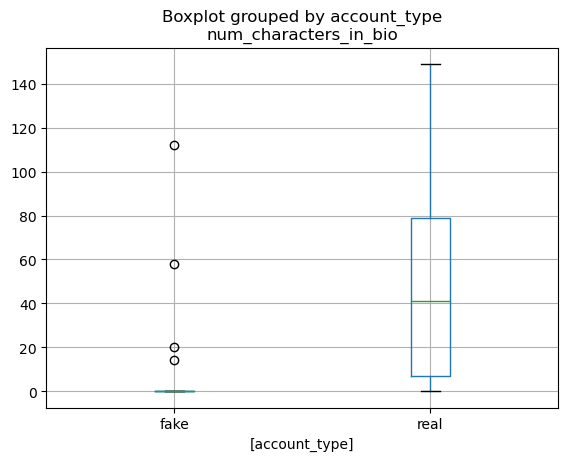

In [8]:
df.boxplot(by = 'account_type')
plt.show()

### 2. Two Samples


#### 2.1. [0.25 pts] Sample Means
Now, calculate the sample mean numerical value of the real accounts and the sample mean numerical value of the fake accounts.

In [19]:
real = df[df['account_type'] == 'real']
sample_mean_real = real['num_characters_in_bio'].mean()
sample_mean_real

51.0

In [21]:
fake = df[df['account_type'] == 'fake']
sample_mean_fake = fake['num_characters_in_bio'].mean()
sample_mean_fake

3.4

#### 2.2.  [0.25 pts] Sample Standard Deviations
Then, calculate the sample standard deviation numerical value of the real accounts and the sample standard deviation numerical value of the fake accounts.

In [12]:
sample_std_real = real['num_characters_in_bio'].std()
sample_std_real

47.310370812758144

In [13]:
sample_std_fake = fake['num_characters_in_bio'].std()
sample_std_fake

16.36987725537159

#### 2.3.  [0.25 pts] Sample Distributions

Finally, plot a histogram of the numerical values for the real accounts. Then plot a histogram of the numerical values for the fake accounts. Make sure you give an appropriate x-axis label, y-axis label, and title for these two plots.

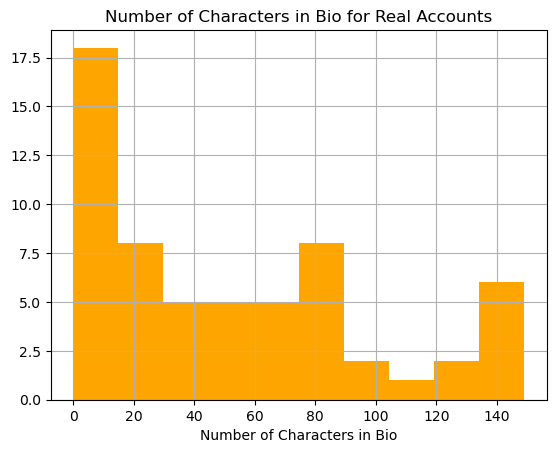

In [14]:
real.hist(color = 'orange')
plt.title('Number of Characters in Bio for Real Accounts')
plt.xlabel('Number of Characters in Bio')
plt.show()

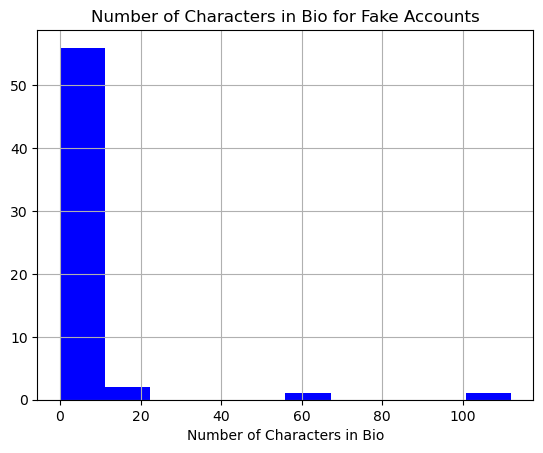

In [15]:
fake.hist(color = 'blue')
plt.title('Number of Characters in Bio for Fake Accounts')
plt.xlabel('Number of Characters in Bio')
plt.show()

### 3. Hypothesis Testing

Finally, we would like to see if we have enough evidence to suggest that there is an association between the account status (ie. fake vs. real) and this numerical variable you chose *for ALL Instagram accounts*. Or in other words, we would like to test whether there is a difference in the population average value for real accounts and the population average value for fake accounts.

*Ex: For instance, I want to know if there is an association between account status and the number of posts an account makes. So I would be interested in testing whether $\mu_{real}-\mu_{fake}\neq 0$, where $\mu_{real}$ is the average number of posts made by all real Instagram accounts and $\mu_{fake}$ is the average number of posts made by all fake Instagram accounts.*

#### 3.1. [0.5 pt] Hypotheses Set Up


First, set up your hypotheses below for this test. You should use the appropriate notation to write these hypotheses. For any population parameter terms that you use, you should define what this parameter refers to. 

H0: $\mu_{real}-\mu_{fake} = 0$, where $\mu_{real}$ is the average number of characters in the real account bio and $\mu_{fake}$ is the average number of characters in the fake account bio <br>
HA: $\mu_{real}-\mu_{fake}\neq 0$, where $\mu_{real}$ is the average number of characters in the real account bio and $\mu_{fake}$ is the average number of characters in the fake account bio 

#### 3.2. [0.75 pt] Hypothesis Test Conditions

Next, check your conditions for conducting this hypothesis test.

This sample distribution of sample mean differences are approximately normal because the following conditions hold: <br>
a) n1 > 30 <br>
b) n2 > 30 <br>
c) Sample 1 in randomly collected and n1 < 10% of all real instagram accounts <br>
d) Sample 2 is randomly collected and n2 < 10% of all fake instagram accounts <br>
e) Observations in sample 1 and sample 2 are independent.

In [24]:
test_stat = (sample_mean_real - sample_mean_fake) / np.sqrt((sample_std_real**2/len(real)) + (sample_std_fake**2/len(fake)))
test_stat

7.36496855438775

#### 4.3. [3 pt] p-value

Calculate the p-value for this hypothesis test.

**Note: you should use the most "accurate" way of calculating this p-value using the methods that we have recently discussed in class.**

In [23]:
from scipy.stats import t
pvalue = 2*(1 - t.cdf(np.abs(test_stat), df = 59))
pvalue

6.514750960917581e-10

#### 4.4. [0.5 pt] Conclusion with p-value

Finally, make a conclusion about your hypotheses with your p-value and a significance level of $\alpha = 0.05$.

Because the p-value is less than 0.05, we reject the null hypothesis. We have sufficient evidence to suggest that the sample mean difference is not equal to 0.

### <u>Contribution Report</u>:

Ethan Wee and Samvit Dedhia